In [15]:
# https://mne.tools/stable/auto_tutorials/raw/40_visualize_raw.html#sphx-glr-auto-tutorials-raw-40-visualize-raw-py
import mne
sample_data_raw_file="./egi_raw.fif"
raw = mne.io.read_raw_fif(sample_data_raw_file)
raw.load_data()

Opening raw data file ./egi_raw.fif...
    Read a total of 1 projection items:
        Average EEG reference (1 x 256)  idle
    Range : 0 ... 199 =      0.000 ...     0.995 secs
Ready.
Reading 0 ... 199  =      0.000 ...     0.995 secs...


<Raw | egi_raw.fif, 256 x 200 (1.0 s), ~769 kB, data loaded>

In [16]:
raw.plot()

In [18]:
spectrum = raw.compute_psd()
spectrum.plot(average=True, picks="data", exclude="bads")

ValueError: If n_per_seg is None n_fft is not allowed to be > n_times. If you want zero-padding, you have to set n_per_seg to relevant length. Got n_fft of 256 while signal length is 200.

In [19]:
import numpy as np
events = np.column_stack(
    (
        np.arange(0, 200, 40),
        np.zeros(5, dtype=int),
        np.array([1, 2, 1, 2, 1]),
    )
)

In [20]:
events

array([[  0,   0,   1],
       [ 40,   0,   2],
       [ 80,   0,   1],
       [120,   0,   2],
       [160,   0,   1]])

In [21]:
event_dict = dict(condition_A=1, condition_B=2)

In [22]:
import mne
epochs = mne.Epochs(raw, events, tmin=-0.1, tmax=0.1, event_id=event_dict, preload=True)
evoked = epochs["condition_A"].average()

Not setting metadata
5 matching events found
Setting baseline interval to [-0.1, 0.0] sec
Applying baseline correction (mode: mean)
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Using data from preloaded Raw for 5 events and 41 original time points ...
1 bad epochs dropped


In [23]:
mne.write_evokeds('evoked_A-ave.fif', evoked, on_mismatch='raise', overwrite=True, verbose=None)

Overwriting existing file.


In [24]:
# save cov
# # https://mne.tools/stable/auto_tutorials/raw/40_visualize_raw.html#sphx-glr-auto-tutorials-raw-40-visualize-raw-py
raw_empty_room=raw
raw_empty_room.info["bads"]


[]

In [25]:
raw_empty_room.add_proj([pp.copy() for pp in raw.info["projs"] if "EEG" not in pp["desc"]])

0 projection items deactivated


<Raw | egi_raw.fif, 256 x 200 (1.0 s), ~769 kB, data loaded>

In [26]:
noise_cov = mne.compute_raw_covariance(raw_empty_room, tmin=-0.1, tmax=0.4)

Using up to 2 segments
Number of samples used : 40
[done]


/tmp/ipykernel_1556297/1690330111.py:1: RuntimeWarning: Too few samples (required : 1285 got : 40), covariance estimate may be unreliable
  noise_cov = mne.compute_raw_covariance(raw_empty_room, tmin=-0.1, tmax=0.4)


    Created an SSP operator (subspace dimension = 1)


Computing rank from covariance with rank=None
    Using tolerance 7.7e-14 (2.2e-16 eps * 256 dim * 1.4  max singular value)
    Estimated rank (eeg): 39
    EEG: rank 39 computed from 256 data channels with 0 projectors


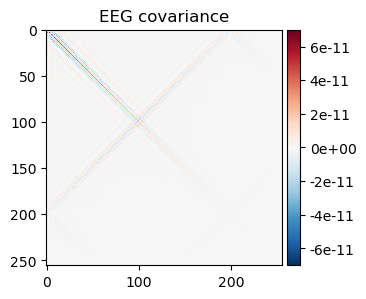

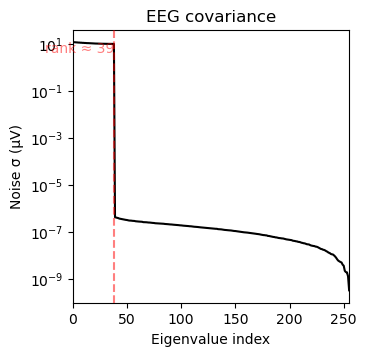

(<Figure size 380x370 with 2 Axes>, <Figure size 380x370 with 1 Axes>)

In [27]:
noise_cov.plot(raw_empty_room.info, proj=True)

In [28]:
mne.write_cov('egi-cov.fif', noise_cov, overwrite=True, verbose=None)

Overwriting existing file.


In [29]:
noise_cov_baseline = mne.compute_covariance(epochs, tmin=-0.1,tmax=0)

Computing rank from data with rank=None
    Using tolerance 1.7e-12 (2.2e-16 eps * 84 dim * 93  max singular value)
    Estimated rank (eeg): 79
    EEG: rank 79 computed from 256 data channels with 1 projector
    Created an SSP operator (subspace dimension = 1)
    Setting small EEG eigenvalues to zero (without PCA)


/tmp/ipykernel_1556297/4167190427.py:1: RuntimeWarning: Too few samples (required : 1285 got : 84), covariance estimate may be unreliable
  noise_cov_baseline = mne.compute_covariance(epochs, tmin=-0.1,tmax=0)


Reducing data rank from 256 -> 79
Estimating covariance using EMPIRICAL
Done.
Number of samples used : 84
[done]
